# <center> _Módulo Machine Learning_
# <center> _Generación 9_
# <center> _Métodos de regularización lineal y expansiones basales_
## <center> Desafío **'*Regularización*'**
----
### <div class="pull-left" style="color:blue"> **por Daniel Zúñiga**</div>
----

#### Nota: Los análisis, respuestas, comentarios y observaciones se realizarán usando el color <span style="color:blue">azul 

---
## Modificamos la visualización del Jupyter y agregamos la posisibilidad de ocultar/mostrar el código

In [1]:
#importamos librerias para cambiar los tamaños de visualización del Jupyter
from IPython.display import display, HTML
#mejoramos la visualización
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
#agregamos javascript y link para mostrar/ocultar el código
HTML(
    '''
    <script>
    code_show=false; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <h4>
    Para ocultar/visualizar el código, presionar <a href="javascript:code_toggle()">AQUI</a>.</h4>
    '''
)

---
## Ejercicio 1: Preparación del Ambiente de Trabajo

### Importamos las librerías necesarias, eliminamos mensajes de advertencia y seteamos elementos cosméticos para gráficos

In [2]:
#librerías clásicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#librería para análisis exploratorio
# import pandas_profiling
from pandas_profiling import ProfileReport

#librería para pre procesamiento
from sklearn.preprocessing import StandardScaler

#librerias para modelamiento
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split

#librerías para las métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#eliminamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

#seteamos elementos cosméticos para los gráficos
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 10)

### Importamos nuestras funciones y cargamos la data

In [3]:
#importamos nuestras funciones
import funciones_auxiliares as fas

In [4]:
#cargamos la data 
df = pd.read_csv('winequality-red.csv')

## Ejercicio 2: Análisis exploratorio

### Identificamos los tipos de datos

In [5]:
#inspeccionamos las variables identificando los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#ispeccionamos visualmente la data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#revisamos el contenido del vector objetivo
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### <span style="color:blue"> Se aprecia que nuestro vector objetivo *_quality_* es una variable categórica numérica

In [8]:
#inspeccionamos la data mediante pandas profile
df.profile_report(style={'full_width':True})

ValidationError: 1 validation error for Settings
style
  extra fields not permitted (type=value_error.extra)

### Identificamos los ouliers univariados

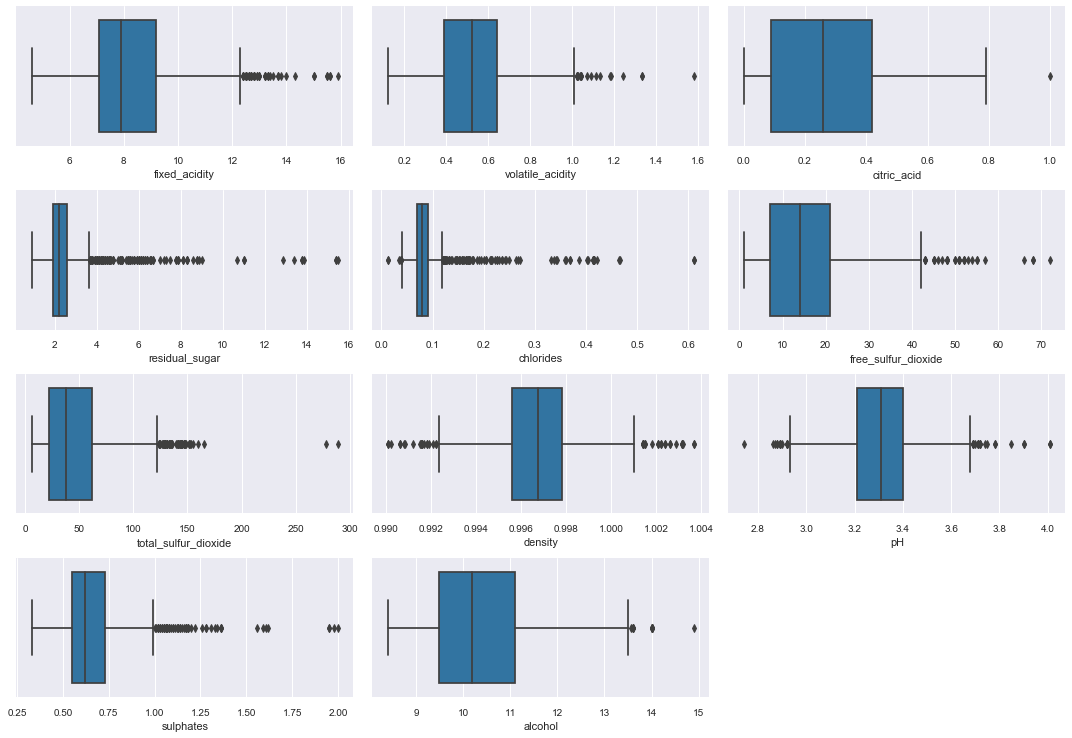

In [ ]:
#mostramos los outliers univariados usando boxplots
n=1
plt.figure(figsize=(15,15))
for j in df.drop(columns='quality').columns:
    plt.subplot((len(list(df.columns))/3)+2,3,n)
    ax=sns.boxplot(x=j,data=df, orient='h')
    n+=1
plt.tight_layout()

### <span style="color:blue"> Se aprecia una gran dispersión en los datos de casi todos los vectores, lo que sugiere la necesidad de aplicar una función logarítmica sobre ellos, como StandarScaler. 

### Identificamos los ouliers multivariados

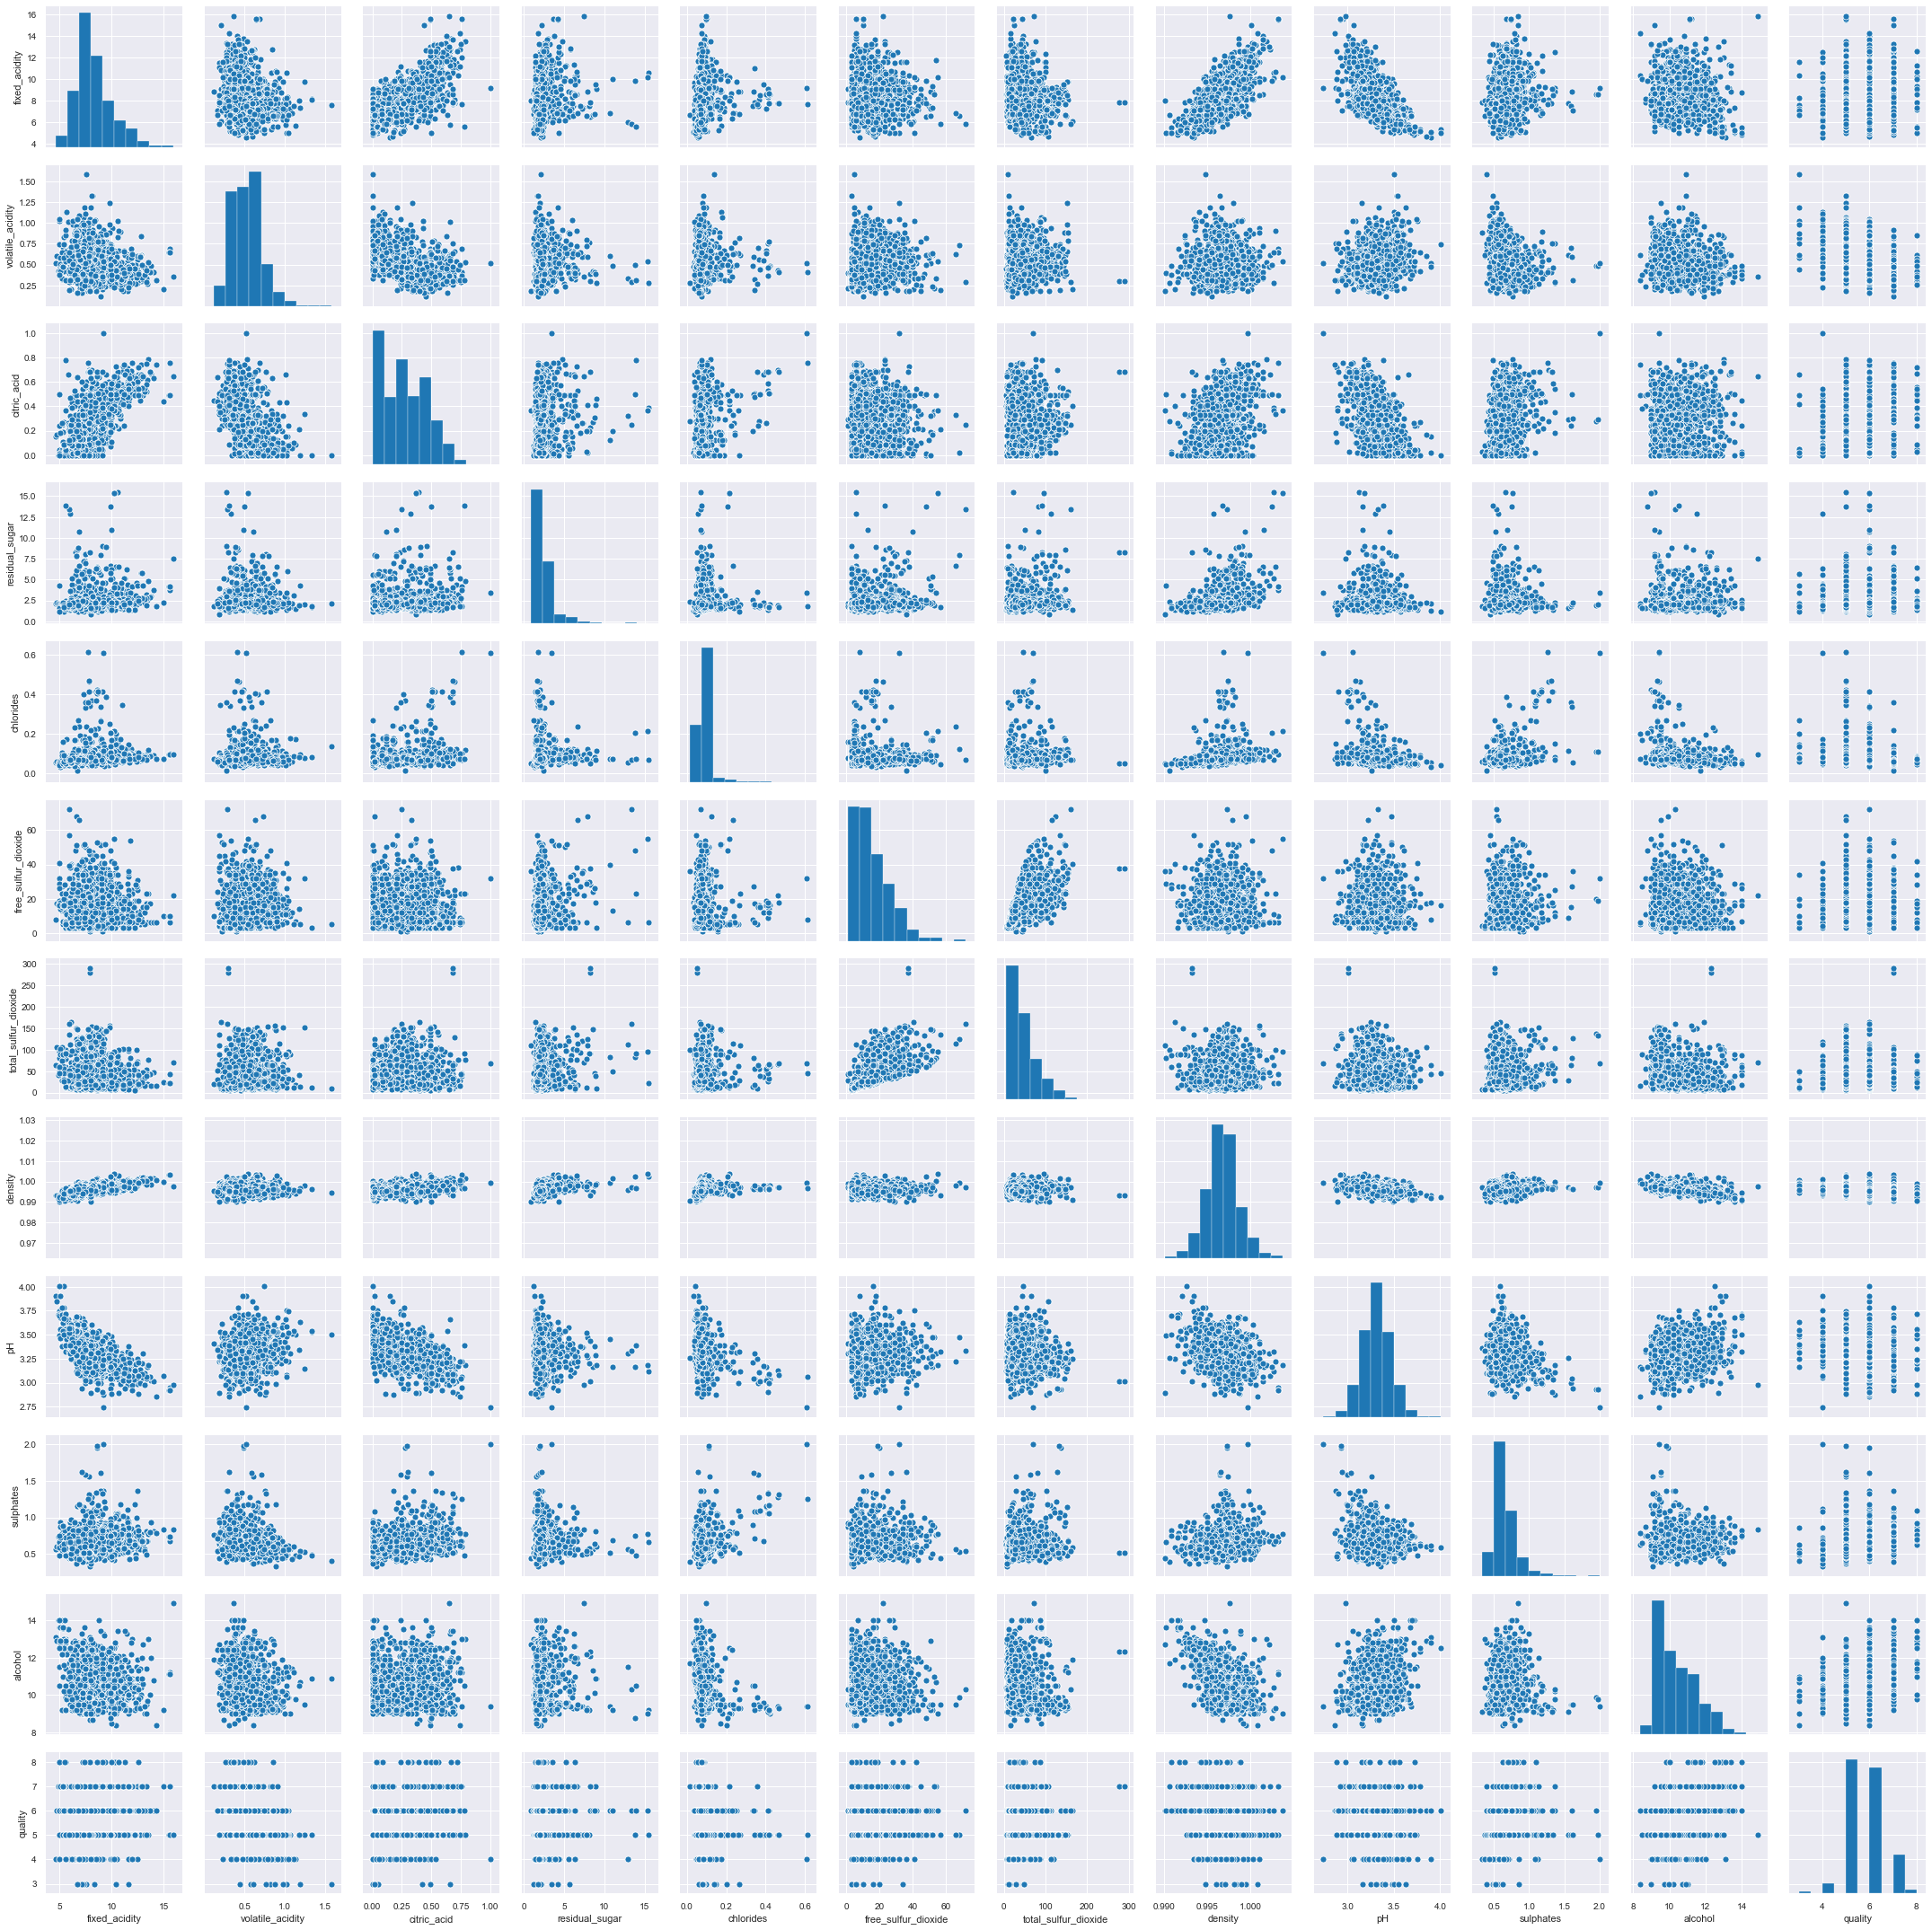

In [ ]:
#ejecutamos pairplot
sns.pairplot(df)

### <span style="color:blue"> Se aprecia la existencia de outliers en la mayoria de tuplas de vectores salvo la que contiene *_density_*

## Ejercicio 3: Regularización de modelos

### Realizamos el pre-procesamiento de la data utilizando $StandarScaler()$

In [ ]:
#aplicamos StandarScaler
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df.drop(columns='quality'))

In [ ]:
#un poco mejor, por que separo entrenamiento de transfomació
#scaler = StandardScaler()
#scaler.fit(df.drop(columns='quality'))

#df_scaled = scaler.transform(df.drop(columns='quality'))




### Dividimos la data

In [ ]:
#dividimos la data
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['quality'], test_size = 0.3, random_state=1234)

In [ ]:
#CORRECTO
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['quality'], test_size = 0.3, random_state=1234)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) #X_train_standarizado
X_test = scaler.transform(X_test) #X_test_standarizado


### Entrenamos los modelos RidgeCV, LassoCV  y ElasticNetCV con 10 validaciones cruzadas

In [ ]:
#Ridge
#modelo_ridge = Ridge().fit(X_train, y_train)
#Lasso
#modelo_lasso = Lasso().fit(X_train, y_train)
#Elastic
#modelo_elastic = ElasticNet().fit(X_train, y_train)

In [ ]:
#creamos una lista de alphas
alphas_prueba = [100, 10, 1, 0.1, 0.01, 0.001] #[0.05, 0.1, 0.15]

In [ ]:
#entrenamos los modelos
ridge_cv = RidgeCV(cv = 10, alphas = alphas_prueba)
model_ridge = ridge_cv.fit(X_train, y_train)

lasso_cv = LassoCV(cv = 10, alphas = alphas_prueba)
model_lasso = lasso_cv.fit(X_train, y_train)

elasticnet_cv = ElasticNetCV(cv = 10, alphas = alphas_prueba)
model_elasticnet = elasticnet_cv.fit(X_train, y_train)

### Obtenemos los mejores $alphas$

In [ ]:
#Obtenemos los mejores alphas para ridgeCV
print(f"El mejor alpha para RidgeCV es {ridge_cv.alpha_}")

El mejor alpha para RidgeCV es 100.0


In [ ]:
#Obtenemos los mejores alphas para lassoCV
print(f"El mejor alpha para LassoCV es {lasso_cv.alpha_}")

El mejor alpha para LassoCV es 0.01


In [ ]:
#Obtenemos los mejores alphas para elasticNetCV
print(f"El mejor alpha para ElasticNetCV es {elasticnet_cv.alpha_}")

El mejor alpha para ElasticNetCV es 0.01


### Obtenemos los $MAE$ y $MSE$

In [ ]:
#creamos una función para obtener MAE y MSE
def errores(y_true, y_hat, modelo_nombre):
    print(f"Modelo {modelo_nombre} MAE -> {mean_absolute_error(y_true,y_hat)}")
    print(f"Modelo {modelo_nombre} MSE -> {mean_squared_error(y_true,y_hat)}")

In [ ]:
#obtenemos los MAE y MSE de RidgeCV
y_hat = model_ridge.predict(X_test)
errores(y_test,y_hat, 'RidgeCV')

Modelo RidgeCV MAE -> 0.47806684410245925
Modelo RidgeCV MSE -> 0.38599599547135355


In [ ]:
#obtenemos los MAE y MSE de LassoCV
y_hat = model_lasso.predict(X_test)
errores(y_test,y_hat, 'LassoCV')

Modelo LassoCV MAE -> 0.4784156010550884
Modelo LassoCV MSE -> 0.3873018875377963


In [ ]:
#obtenemos los MAE y MSE de ElasticNetCV
y_hat = elasticnet_cv.predict(X_test)
errores(y_test,y_hat, 'ElasticNetCV')

Modelo ElasticNetCV MAE -> 0.47874774593155656
Modelo ElasticNetCV MSE -> 0.38895914356244815


### <span style="color:blue"> Se aprecia que el modelo $RidgeCV$ presenta un mejor desempeño en base a las métricas

### Obtenemos los coeficientes estimados

In [ ]:
#creamos un DF para los coeficientes
b = ['RidgeCV', 'LassoCV', 'ElasticNetCV']
df_coeficientes = pd.DataFrame([ridge_cv.coef_, lasso_cv.coef_, elasticnet_cv.coef_],index = b, columns= df.drop(columns='quality').columns)
#listamos los coeficientes
df_coeficientes.T

,RidgeCV,LassoCV,ElasticNetCV
fixed_acidity,0.061004,0.003862,0.019947
volatile_acidity,-0.189932,-0.195553,-0.202667
citric_acid,-0.016174,-0.001503,-0.023733
residual_sugar,0.013645,-0.000000,-0.000000
chlorides,-0.071574,-0.067503,-0.070460
free_sulfur_dioxide,0.051967,0.042414,0.054886
total_sulfur_dioxide,-0.115664,-0.108726,-0.119107
density,-0.052967,-0.000000,-0.003673
pH,-0.042837,-0.056656,-0.063366
sulphates,0.153949,0.147531,0.153713


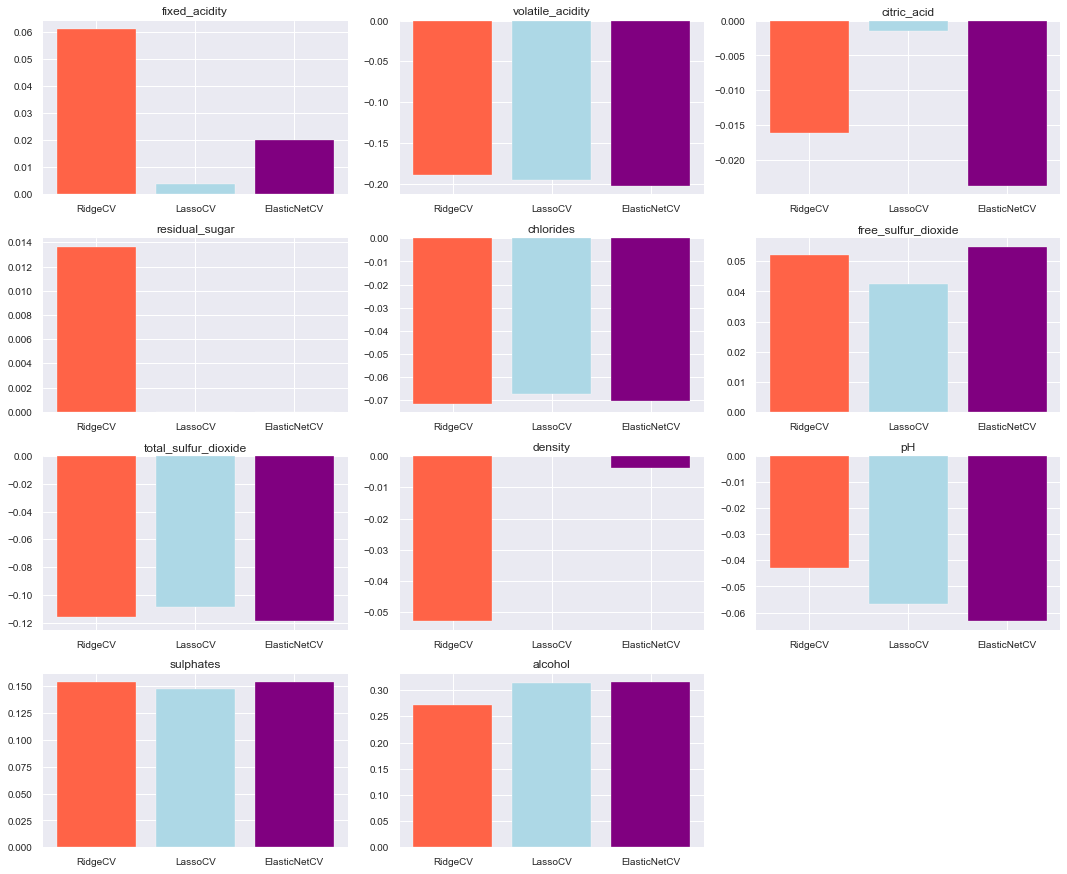

In [ ]:
#graficamos los coeficientes de los modelos por atributo
plt.figure(figsize=(15,15))
fas.barras_por_atributo(df_coeficientes)

### <span style="color:blue"> Los siguentes atributos mantienen un comportamiento similar a lo largo de cada modelo: 
* <span style="color:blue"> volatile acidity
* <span style="color:blue"> chlorides
* <span style="color:blue"> free sulfur dioxide
* <span style="color:blue"> free sulfur dioxide
* <span style="color:blue"> total sulfur dioxide
* <span style="color:blue"> pH
* <span style="color:blue"> sulphates
* <span style="color:blue"> alcohol